In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

import datetime as dt

In [ ]:
#   File Beer beer_evaluations.xlsx
#   --------------------------------------

    #   Build "Beer_evaluations.xlsx" from the "beer_review.csv" file  enriched with a BJPC classification code



In [2]:
#   MAIN - Fetch beer review raw data
#   ---------------------------

beer_reviews = pd.read_csv(r'C:\Users\t.vincotte\Documents\CODE\TFE\EoF - Work\Beer_Profile\Source_Files\beer_reviews.csv') 
 

In [3]:
beer_reviews.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [ ]:
#   LONG PLAY - Fetch beer review raw data
#   ---------------------------------------------

#   bjcp_match= pd.read_excel(r'C:\Users\t.vincotte\Documents\CODE\TFE\EoF - Work\Beer_Profile\Source_Files\BJCP_style_matching.xlsx',sheet_name='rough_listing')  
 

In [ ]:
#   LONG PLAY
#   ---------------

#   bjcp_match

Demarche - LONG PLAY

Idee est de definir les colonnes dans l'ordre souhaité avec le nom souhaité en faisant le match avec les code BJCP

    -   https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
    -       Il est possible d'ajouter les colonnes avec le nom souhaité
    -       Il est possible de renommer les colonnes  - rename()   [   air_quality_renamed = air_quality_renamed.rename(columns=str.lower) ]

    Beer Id             <       beer_beerid
    Beer Name           <       beer_name
    Beer Style          <       beer_style
    BJCP Ref
    Brewery Id          <       brewery_id
    Brewery Name        <       brewery_name
    ABV                 <        beer_abv
    review_time         <        review_time   
    review_aroma        <        review_aroma  
    review_appearance   <        review_appearance   
    review_palate       <        review_palate  
    review_taste        <        review_taste   
    review_overall      <        review_overall   
    review_profilename  <        review_profilename   
    

In [4]:
#   MAIN - Columns Rename - Full dataset
#   ---------------------------------------

beer_reviews.rename(columns={"beer_beerid":"Beer Id",
                             "beer_name":"Beer Name",
                             "beer_style":"Beer Style",
                             "brewery_id":"Brewery Id",
                             "brewery_name":"Brewery Name",
                             "beer_abv":"ABV"},inplace=True)


In [5]:
#   MAIN - Insert a column for a potential extension
    # Find # of rows : https://saturncloud.io/blog/5-easy-ways-to-get-pandas-dataframe-row-count/#:~:text=The%20simplest%20and%20most%20straightforward,of%20rows%20in%20the%20DataFrame.
    # Add an empty column in a dataframe : https://www.geeksforgeeks.org/how-to-add-empty-column-to-dataframe-in-pandas/
#   --------------------------------------------------------------------------------------------------------------------------------------------

beer_reviews['BJCP Ref'] = ''
#   beer_reviews.head(10)


# beer_reviews.insert(0, 'BJCP Ref', '')  - Mydataframe.insert(0, 'Roll Number', '')

In [ ]:
#   LONG PLAY - Addition du code BJCP par Merge du fichier BJCP_Style_Match
#   -------------------------------------------------------------------------------
    #   frame_1.merge(frame_2, how='left', left_on='county_ID', right_on='countyid')

    #   beer_reviews_merged = beer_reviews.merge(bjcp_match,how='left',left_on='Beer Style', right_on='Beer Style')
    #   beer_reviews_merged.head(10)


In [6]:
#   Convert review time in date time
#       https://www.askpython.com/python-modules/pandas/convert-int64-to-datetime
#       https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
         #   df['When?'] = pd.to_datetime(df['When?'],format = '%y%m%d%H%M')


    #   https://sentry.io/answers/convert-unix-timestamp-to-date-and-time-in-javascript/#:~:text=The%20Unix%20timestamp%20is%20an,can%20be%20written%20as%201691622800.
    #   https://note.nkmk.me/en/python-unix-time-datetime/


#   ------------------------------------------------------------------------

# datetime.fromtimestamp(beer_reviews_merged['review_time'])

# beer_reviews_merged['review_time']=(beer_reviews_merged['review_time']).datetime.fromtimestamp(0)
beer_reviews['review_time'] = pd.to_datetime(beer_reviews['review_time'],unit = 's',origin='unix')
beer_reviews



,Brewery Id,Brewery Name,review_time,review_overall,review_aroma,review_appearance,review_profilename,Beer Style,review_palate,review_taste,Beer Name,ABV,Beer Id,BJCP Ref
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,
1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,


Example chatGPt - format unix est "secondes"
import pandas as pd

# Exemple de DataFrame
df = pd.DataFrame({
    'timestamp_unix': [1617187200, 1617273600, 1617360000]  # timestamps Unix en secondes
})

# Conversion en datetime
df['datetime'] = pd.to_datetime(df['timestamp_unix'], unit='s')

print(df)import pandas as pd



In [7]:
#   Create a test subset used during ETL build up phase
#   ------------------------------------------------------

beer_review_sample = beer_reviews.head(40)


In [8]:
#   Creation of beer_evaluation dataset  - SUBSET - ETL Preparation
#   -------------------------------------------------------------------

beer_evaluation = beer_review_sample[['Beer Id','Beer Name','Beer Style','BJCP Ref','Brewery Id','Brewery Name','ABV','review_time','review_aroma','review_appearance','review_palate','review_taste','review_overall','review_profilename']]
beer_evaluation

,Beer Id,Beer Name,Beer Style,BJCP Ref,Brewery Id,Brewery Name,ABV,review_time,review_aroma,review_appearance,review_palate,review_taste,review_overall,review_profilename
0,47986,Sausa Weizen,Hefeweizen,,10325,Vecchio Birraio,5.0,2009-02-16 20:57:03,2.0,2.5,1.5,1.5,1.5,stcules
1,48213,Red Moon,English Strong Ale,,10325,Vecchio Birraio,6.2,2009-03-01 13:44:57,2.5,3.0,3.0,3.0,3.0,stcules
2,48215,Black Horse Black Beer,Foreign / Export Stout,,10325,Vecchio Birraio,6.5,2009-03-01 14:10:04,2.5,3.0,3.0,3.0,3.0,stcules
3,47969,Sausa Pils,German Pilsener,,10325,Vecchio Birraio,5.0,2009-02-15 19:12:25,3.0,3.5,2.5,3.0,3.0,stcules
4,64883,Cauldron DIPA,American Double / Imperial IPA,,1075,Caldera Brewing Company,7.7,2010-12-30 18:53:26,4.5,4.0,4.0,4.5,4.0,johnmichaelsen
5,52159,Caldera Ginger Beer,Herbed / Spiced Beer,,1075,Caldera Brewing Company,4.7,2012-01-02 17:17:39,3.5,3.5,3.0,3.5,3.0,oline73
6,52159,Caldera Ginger Beer,Herbed / Spiced Beer,,1075,Caldera Brewing Company,4.7,2011-10-19 02:25:15,3.5,3.5,4.0,4.0,3.5,Reidrover
7,52159,Caldera Ginger Beer,Herbed / Spiced Beer,,1075,Caldera Brewing Company,4.7,2011-05-24 22:26:58,2.5,3.5,2.0,3.5,3.0,alpinebryant
8,52159,Caldera Ginger Beer,Herbed / Spiced Beer,,1075,Caldera Brewing Company,4.7,2010-11-22 19:35:03,3.0,3.5,3.5,4.0,4.0,LordAdmNelson
9,52159,Caldera Ginger Beer,Herbed / Spiced Beer,,1075,Caldera Brewing Company,4.7,2010-09-28 00:15:24,3.5,5.0,4.0,4.0,4.5,augustgarage


In [9]:
#   get begin and end period in order to give parameters to DimDate
#   -----------------------------------------------------------------

beer_review_dates = beer_reviews[['review_time']].sort_values(by='review_time')
beer_review_dates.head(10)              #   1996
beer_review_dates.tail(10)              #   2012

,review_time
852288,2012-01-11 08:55:07
1420840,2012-01-11 09:00:38
989617,2012-01-11 09:11:46
428421,2012-01-11 09:20:14
1134366,2012-01-11 09:21:50
562035,2012-01-11 09:34:14
1153730,2012-01-11 09:44:09
400524,2012-01-11 10:10:56
551392,2012-01-11 12:29:30
551371,2012-01-11 12:35:48


In [ ]:
#   Creation of beer_evaluation dataset - FULL LOAD
#   -----------------------------------------------------------

    # beer_evaluation = beer_reviews[['Beer Id','Beer Name','Beer Style','BJCP Ref','Brewery Id','Brewery Name','ABV','review_time','review_aroma','review_appearance','review_palate','review_taste','review_overall','review_profilename']]
    # beer_evaluation

BeerEvalStageId INT IDENTITY (1,1),
   Beer_Id INT,
   Beer_Name VARCHAR(50),
   Beer_Style VARCHAR(50),
   BJCP_Ref VARCHAR(3),
   Brewery_Id INT,
   Brewery_Name VARCHAR(50),
   ABV DECIMAL(4,2),
   review_time INT,
   review_aroma DECIMAL(4,2),
   review_appearance DECIMAL(4,2),
   review_palate DECIMAL(4,2),
   review_taste DECIMAL(4,2),
   review_overall DECIMAL(4,2),
   review_profilename VARCHAR(50),
   # Creation_date DATE,
   #Last_updated DATE,

In [9]:
#   Create Excel file Beer_evaluations.xlsx - to be loaded in staging - Creation and load of excel file
#   ---------------------------------------------------------------------------------------------------------

df1 = pd.DataFrame()
beer_evaluation.to_excel("Beer_evaluations.xlsx",sheet_name='staging_source')

In [ ]:
#   Create Excel file Beer_evaluations.xlsx - to be loaded in staging - load of excel file
#   ----------------------------------------------------------------------------------------------

with pd.ExcelWriter('Beer_evaluations.xlsx', engine='openpyxl', mode='u') as writer:
    # Write the new DataFrame to a new sheet
    beer_evaluation.to_excel(writer, sheet_name='staging_source', index=True)


In [ ]:
#   Split dataset

cont_float_feature=rawdata.select_dtypes(float)
cont_int_features=rawdata.select_dtypes(int)
cat_feature= rawdata.select_dtypes(object)
cat_feature


In [7]:
for col in cat_feature.columns:
    display(col)
    print('----------------')
    display(cat_feature[col].unique())
    display(cat_feature[col].value_counts())



'brewery_name'

----------------


array(['Vecchio Birraio', 'Caldera Brewing Company',
       'Amstel Brouwerij B. V.', ..., 'Wissey Valley Brewery',
       'Outback Brewery Pty Ltd', 'Georg Meinel Bierbrauerei KG'],
      dtype=object)

brewery_name
Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
                                      ...  
Brasserie Du Corsaire                     1
Willoughby Brewing Company                1
Factory Beer                              1
Denen Plaza Kawaba Brewery                1
Iceberg Corp. Of America                  1
Name: count, Length: 5742, dtype: int64

'review_profilename'

----------------


array(['stcules', 'johnmichaelsen', 'oline73', ..., 'hogshead',
       'NyackNicky', 'joeebbs'], dtype=object)

review_profilename
northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
                  ... 
Icebird757           1
postroad             1
brendanspub          1
Hobbitjedi           1
Gitguy               1
Name: count, Length: 33387, dtype: int64

'beer_style'

----------------


array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: count, Length: 104, dtype: int64

'beer_name'

----------------


array(['Sausa Weizen', 'Red Moon', 'Black Horse Black Beer', ...,
       'Baron Von Weizen', 'Resolution #2', "The Horseman's Ale"],
      dtype=object)

beer_name
90 Minute IPA                          3290
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3111
Sierra Nevada Celebration Ale          3000
Two Hearted Ale                        2728
                                       ... 
Ruddy Glow                                1
Old Oakland Ale                           1
Yellowjacket Ale                          1
Megalodon                                 1
Alpha Beta                                1
Name: count, Length: 56857, dtype: int64

Outcome of unique and value counts
-----------------------------------
Full name and description - leaf level
Analysis possible per name (label), style, brewery
Some bears / style/ breweries .... evaluated a lot, other very few = big name
Set of evaluators providing a lot of evaluation - some very few - to e seen if outliers eval in the 'few' categories


In [8]:
cont_float_feature.info()
cont_int_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   review_overall     1586614 non-null  float64
 1   review_aroma       1586614 non-null  float64
 2   review_appearance  1586614 non-null  float64
 3   review_palate      1586614 non-null  float64
 4   review_taste       1586614 non-null  float64
 5   beer_abv           1518829 non-null  float64
dtypes: float64(6)
memory usage: 72.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   brewery_id   1586614 non-null  int64
 1   review_time  1586614 non-null  int64
 2   beer_beerid  1586614 non-null  int64
dtypes: int64(3)
memory usage: 36.3 MB


In [5]:
cont_float_feature

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,1.5,2.0,2.5,1.5,1.5,5.0
1,3.0,2.5,3.0,3.0,3.0,6.2
2,3.0,2.5,3.0,3.0,3.0,6.5
3,3.0,3.0,3.5,2.5,3.0,5.0
4,4.0,4.5,4.0,4.0,4.5,7.7
...,...,...,...,...,...,...
1586609,5.0,4.0,3.5,4.0,4.0,5.2
1586610,4.0,5.0,2.5,2.0,4.0,5.2
1586611,4.5,3.5,3.0,3.5,4.0,5.2
1586612,4.0,4.5,4.5,4.5,4.5,5.2


Outcome of float
    Review columns > detailed ratings = to be seen if profile ratings is average, median value of detailed ratings
    Detailed rating evolve over time
    Are profile ratings a picture at a certain moment


In [10]:
cont_int_features

,brewery_id,review_time,beer_beerid
0,10325,1234817823,47986
1,10325,1235915097,48213
2,10325,1235916604,48215
3,10325,1234725145,47969
4,1075,1293735206,64883
...,...,...,...
1586609,14359,1162684892,33061
1586610,14359,1161048566,33061
1586611,14359,1160702513,33061
1586612,14359,1160023044,33061


Integer
- beer id, brewery id - no aggrgation
- time to be transformed in date


In [11]:
#   GRAPHS
#   -------------


In [17]:
FIGSIZE = (6,7)    # Taille figure en pouce - utlise dans tous les graphes
FIGSIZE2 = (3,4)

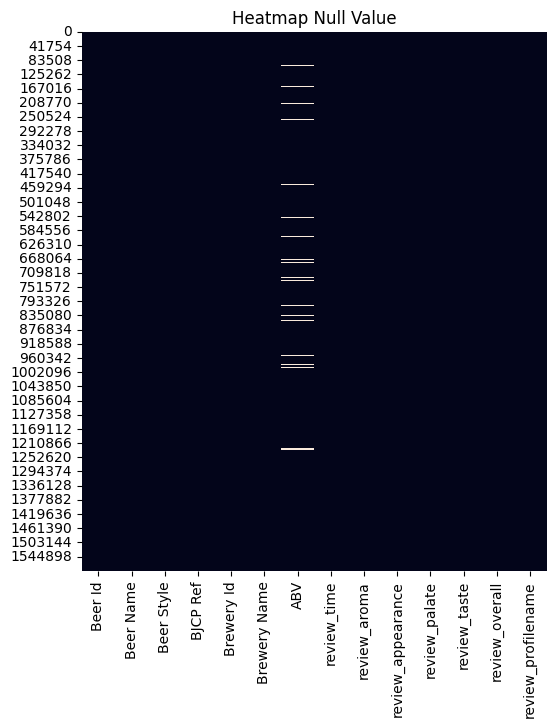

In [19]:
#   Repérer s'il y a des NULL et leur distribution / localisation
#   ---------------------------------------------------------------
plt.figure(figsize=FIGSIZE)         # Fonction figure > declarer figure dans laquelle je vais travailler
plt.title('Heatmap Null Value')     #   Titre de la figure
sns.heatmap(beer_evaluation.isna(),cbar=False)      # Utilise graphique heatmap de seaborn dans matlpotlib / 
                                            #   isna nous dnne un masque boleen
plt.show()

Few NULL / missing values in beer_abv - can be retrieved in beer profile and ratings

In [ ]:
#   Analyser continuous features - integers ID and Time == Not relevant 
#   ==========================================

# X_continuous = rawdata[['Body','Bitter','Alcohol']] 

for i, col in enumerate(cont_int_features):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 

Not relevant hre -id and time fields

In [ ]:
#   Graphes sur variables catégorielles > distribution
#   -----------------------------------------------------

X_discrete = rawdata[['beer_style','brewery_name']] 
 
for i, col in enumerate(X_discrete):                     
    plt.figure(figsize=(12,10))
    plt.subplot(3,3,1)
    plt.title(f'Countplot de {col}')
    sns.countplot(data=rawdata,x=col,hue=col)
    plt.tight_layout() 
    plt.show() 



Some breweries and beer styles evaluated more the others  this graph is not readable as too many items

In [7]:
cont_float_feature

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,1.5,2.0,2.5,1.5,1.5,5.0
1,3.0,2.5,3.0,3.0,3.0,6.2
2,3.0,2.5,3.0,3.0,3.0,6.5
3,3.0,3.0,3.5,2.5,3.0,5.0
4,4.0,4.5,4.0,4.0,4.5,7.7
...,...,...,...,...,...,...
1586609,5.0,4.0,3.5,4.0,4.0,5.2
1586610,4.0,5.0,2.5,2.0,4.0,5.2
1586611,4.5,3.5,3.0,3.5,4.0,5.2
1586612,4.0,4.5,4.5,4.5,4.5,5.2


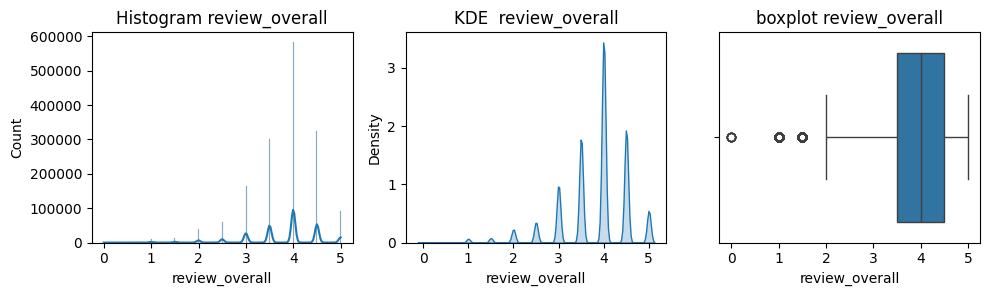

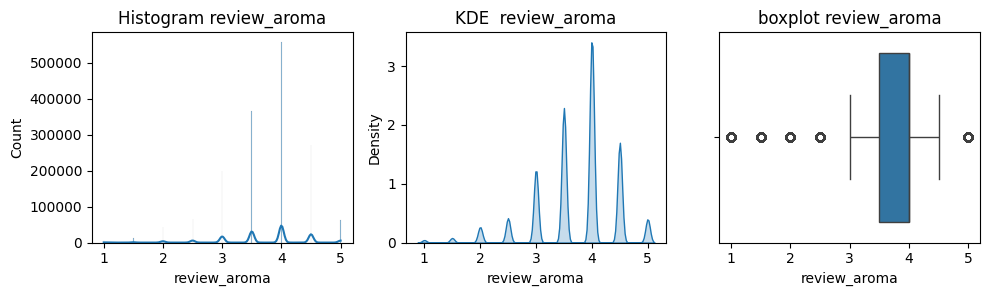

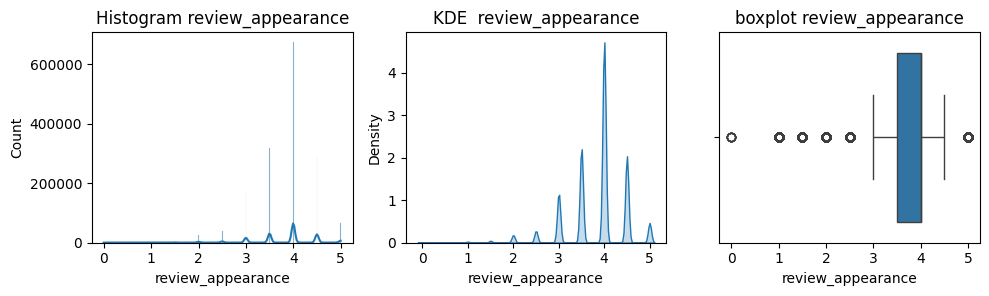

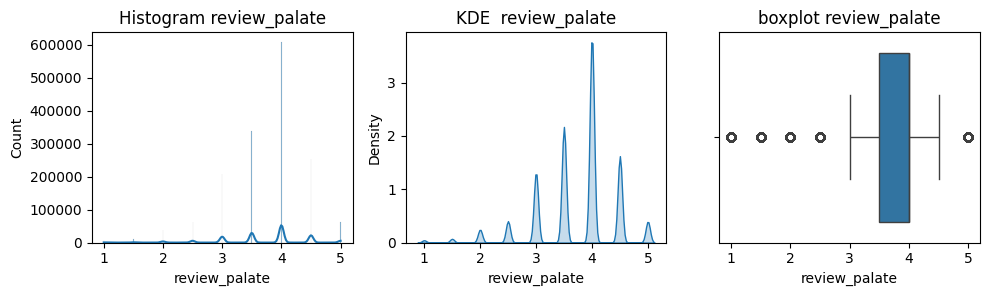

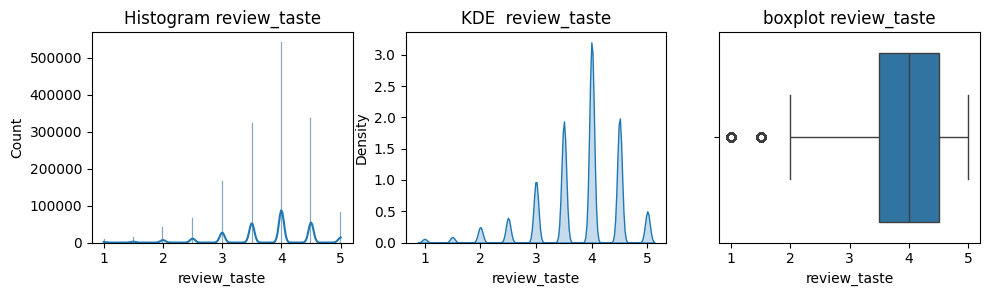

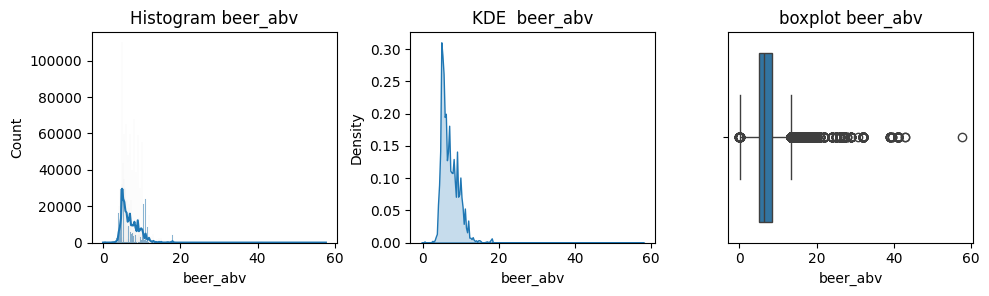

In [8]:
#   Analyser continuous features - reviews
#   ==========================================

for i, col in enumerate(cont_float_feature):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 


Reviews in line with profile and ratings file but more narrowly orgqnized around single ratings while seems more distributed when taking average